# LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as func
import os
from scipy.optimize import curve_fit

<style>
    /* Apply CSS to the heading to expand the background */
    h2 {
        background-color: yellow;
        padding: 10px;
        width: 100%; /* Expand the width to 100% */
        color: black; /* Set the text color to blue */
    }
</style>

## Measurements.


### <span style="background-color: white; padding: 10px;"><font color='black'>Measurement constants.</font></span>


#### Sampling contants

In [2]:
channels_list = [0,1,2,3,4,5,6,7,16,17]
n_sample      = 50
N             = 16
sampling_rate = 480000 / len(channels_list)

#### Chip selection

In [3]:
chip_conf_dict = {
    '8x8_MZI_X_1': {
        "chip_color"        : "green1",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '8x8_3MZI_1': {
        "chip_color"        : "green2",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '8x8_MZI_X_2': {
        "chip_color"        : "green3",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '8x8_3MZI_2': {
        "chip_color"        : "green4",
        "phase_shifter_mzm" : [62,61,60,59,58,57,56,55,7,8,9,10,11,12,13,14],
        "phase_shifters"    : [ [ [64, 66], [63, 65], [15, 17], [16, 18] ],
                                [ [67, 70], [19, 69], [20, 21] ],
                                [ [75, 77], [71, 73], [22, 24], [23, 25] ],
                                [ [79, 90], [26, 76], [27, 28] ],
                                [ [82, 84], [81, 83], [29, 31], [30, 32] ],
                                [ [85, 87], [36, 86], [34, 35] ],
                                [ [89, 91], [88, 90], [40, 42], [38, 39] ],
                                [ [92, 94], [43, 93], [44, 46] ]
                               ],
        "phase_mask"        : [68,72,74,78,33,37,41,45],
        "nidaq_list"        : [0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    },
    '4x4_MZI_Sim_part2': {
        "chip_color"        : "red",
        "phase_shifter_mzm" : [ 30, 29, 28, 27, 26, 25, 24, 23 ],
        "phase_shifters"    : [[ [32, 34], [31, 33] ],
                               [ [36, 37] ],
                               [ [39, 40], [41, 43] ],
                               [ [44, 46] ]
                              ],
        "phase_mask"        : [45, 42, 38, 35],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '4x4_MZI_Sim_part1': {
        "chip_color"        : "orange",
        "phase_shifter_mzm" : [ 71, 72, 73, 74, 72, 71, 70, 69 ],
        "phase_shifters"    : [[ [79, 81], [81, 82] ],
                               [ [83, 85] ],
                               [ [86, 88], [90, 91] ],
                               [ [93, 94] ]
                              ],
        "phase_mask"        : [92, 89, 87, 84],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '4x4_MZI_X': {
        "chip_color"        : "blue_top",
        "phase_shifter_mzm" : [ 30, 29, 28, 27, 26, 25, 24, 23 ],
        "phase_shifters"    : [[ [32, 34], [31, 33] ],
                               [ [36, 37] ],
                               [ [39, 40], [41, 43] ],
                               [ [44, 46] ]
                              ],
        "phase_mask"        : [45, 42, 38, 35],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '4x4_3MZI': {
        "chip_color"        : "blue_bottom",
        "phase_shifter_mzm" : [ 71, 72, 73, 74, 72, 71, 70, 69 ],
        "phase_shifters"    : [[ [79, 81], [81, 82] ],
                               [ [83, 85] ],
                               [ [86, 88], [90, 91] ],
                               [ [93, 94] ]
                              ],
        "phase_mask"        : [92, 89, 87, 84],
        "nidaq_list"        :[0,1,2,3,4,5,6,7,16,17]
    },
    '8x8_MZI': {
        "chip_color": "purple",
        "phase_shifter_mzm": None,
        "phase_shifters": None,
        "phase_mask": None,
        "nidaq_list":[0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23]
    }
}


In [4]:
chip_name = "4x4_MZI_X"
chip_selection = chip_conf_dict[chip_name]
chip_color, phase_shifter_mzm,phase_shifters, phase_mask,nidaq_channels = tuple(chip_selection.values())

#### MZI dictionnaries

### <span style="background-color: white; padding: 10px;"><font color='black'>Individual measurements.</font></span>


In [5]:
# voltage
v_max = 7

# current
i_max = 15

# step
step_iv = 0.1

N_STEP = int(i_max / step_iv)


In [6]:
import importlib
importlib.reload(func)

<module 'functions' from 'c:\\Users\\QPG\\Downloads\\Marseille\\Marseille\\functions.py'>

Driver thresholds set @ 12 V , 20 mA
QXOutput.__setattr__: Warning: Overwriting of 'vmax' is forbidden.
The sweep goes from 0 to 15 with 150 steps.
Voltage -0.0007 Current -0.0018
Time to write 0.015956401824951172 and the time to acquire0.10056471824645996
Voltage 0.0509 Current 0.1106
Time to write 0.012961387634277344 and the time to acquire0.09872722625732422
Voltage 0.0987 Current 0.2115
Time to write 0.015959978103637695 and the time to acquire0.1066884994506836
Voltage 0.1493 Current 0.3138
Time to write 0.013956546783447266 and the time to acquire0.09575819969177246
Voltage 0.201 Current 0.4147
Time to write 0.0169677734375 and the time to acquire0.10571885108947754
Voltage 0.2547 Current 0.5179
Time to write 0.015955209732055664 and the time to acquire0.10371732711791992
Voltage 0.3076 Current 0.6184
Time to write 0.013952255249023438 and the time to acquire0.09773087501525879
Voltage 0.3614 Current 0.7214
Time to write 0.012964248657226562 and the time to acquire0.09973359107

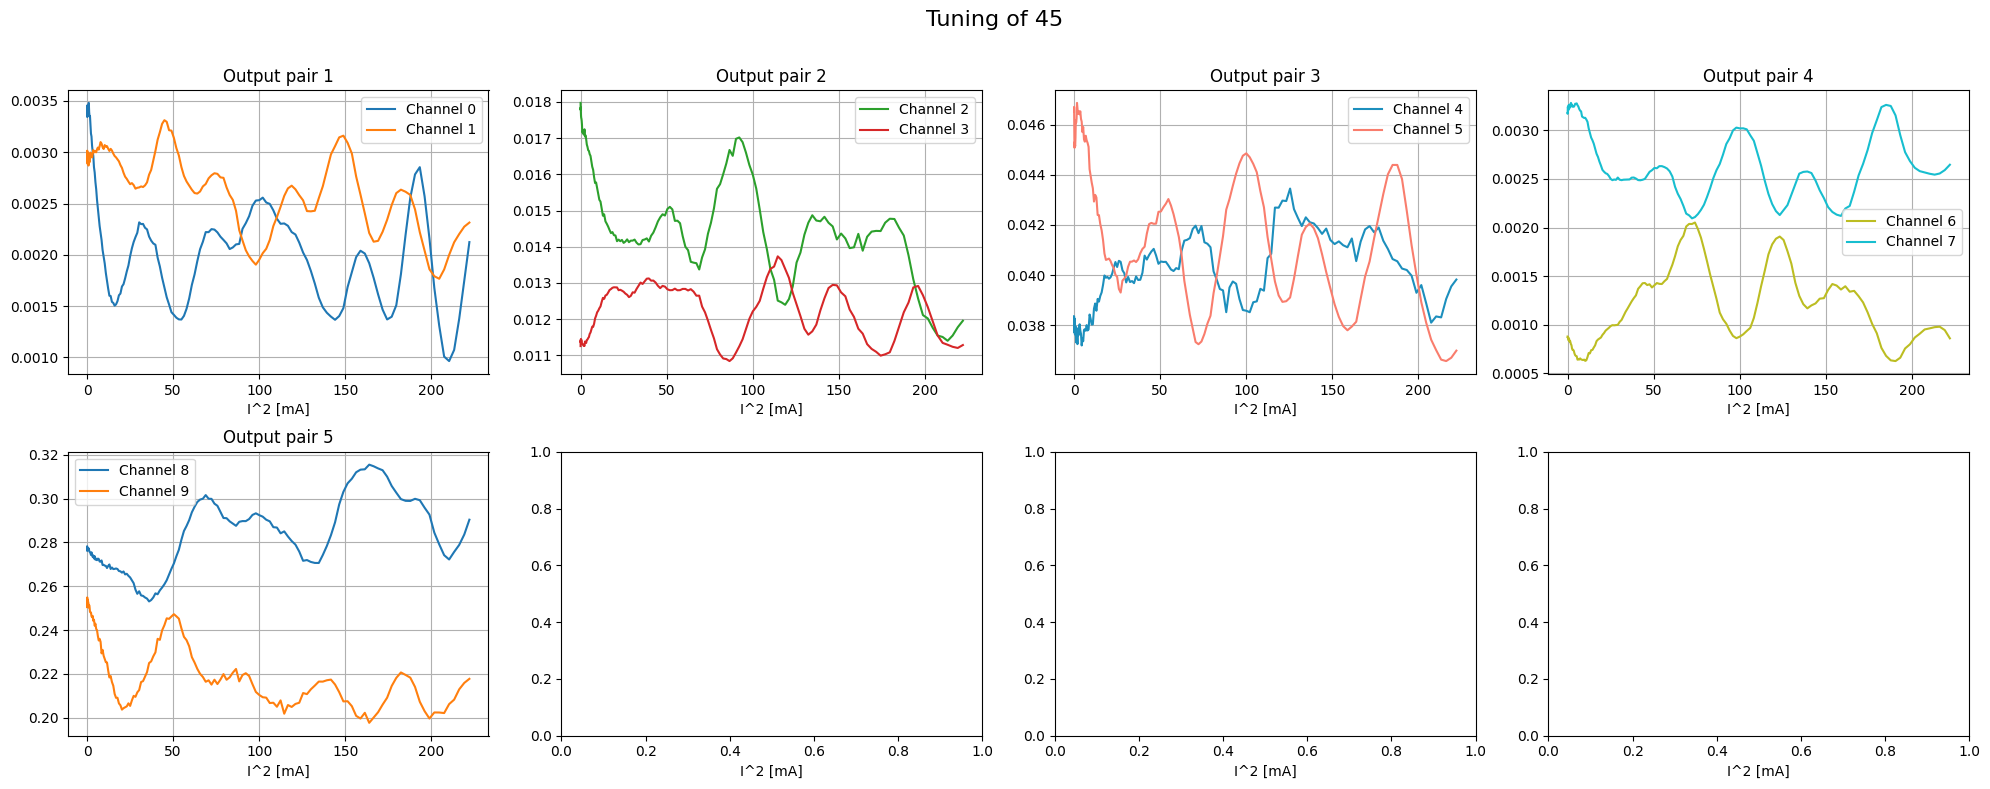

In [8]:
input = True
if input:
    phase_shifter_port = 45
    current = np.arange(0, i_max, step_iv)
    current_squared = current**2
    V_raw,I_raw,V_phs,I_phs = func.sweep_current_collect_ports(phase_shifter_port,nidaq_channels,sampling_rate,n_sample,i_max,step_iv)
    P = func.to_mean_power(V_raw,I_raw)
    func.plot_channels(P, current_squared, phase_shifter_port)
    # DevInfo = func.device_tunning_info(phase_shifter_port, V_raw, I_raw,V_phs, I_phs, None, current)
    # func.save_dict(DevInfo, f"blue\\phase_shifter\\current\\0")

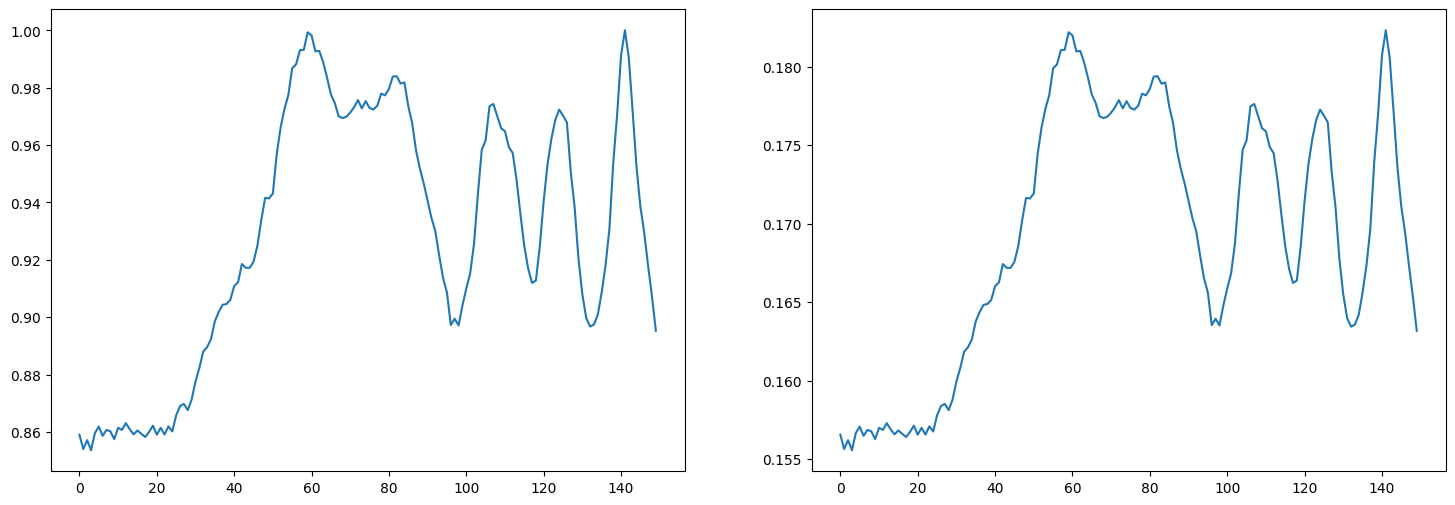

In [15]:
def theta(P):
    return 2*np.arcsin(P)
P1 = np.array(V_raw[7]).mean(axis=1)
P2 = np.array(V_raw[8]).mean(axis=1)
P_tot = (P1+P2)
P_nrom = P_tot/P_tot.max()
Theta_Crosstalk = theta(P_tot)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)  # First subplot in a 2x1 grid
plt.plot(P_nrom)
plt.subplot(1, 2, 2)  # Second subplot in a 2x1 grid
plt.plot(Theta_Crosstalk)
plt.show()


#### Current sweep

In [9]:
# Current tunning
input = False
ps_top_bottom_crossing   =[phase_shifters[0][0][1],
                           phase_shifters[1][0][1],
                           phase_shifters[2][1][0]
                          ]
phase_shifter_set        = [ [30, 1], [27, 0], [26, 0],[23, 0] ]
phase_shifter_set_folder = f".data\\blue\\mzm\\max_min"
rep = 10
if input :
    current = np.arange(0, i_max, step_iv)
    current_squared = current**2
    for repet in range(rep):
        for phase_shifter_port in ps_top_bottom_crossing:
            V_raw,I_raw,V_phs,I_phs = func.sweep_current_collect_ports(phase_shifter_port,channels_list,sampling_rate,n_sample,i_max,step_iv,phase_shifter_set,phase_shifter_set_folder)
            P = func.to_mean_power(V_raw,I_raw)
            # func.plot_channels(P, current_squared, phase_shifter_port)
            DevInfo = func.device_tunning_info(phase_shifter_port, V_raw, I_raw,V_phs, I_phs, None, current)
            func.save_dict(DevInfo, f"{chip_name}\\phase_shifter\\current\\top_bottom_crossing\\{repet}")

#### Plot dictionnary values and fitting

In [10]:
# Define the folder and parameters
meas_folder = f".data\\blue\\mzm\\current"
get_n_meas  = 5
dev_names   = [34,37,41]
dev_names   = [23,24,25,26,27,28,29,30]
print(dev_names)
cha_names   = [0,1,2,3,4,5,6,7]

fit_folder = f".data\\blue\\mzm\\fitting_params\\current"
fit_param = func.read_pkls_in_current_directory(fit_folder)

# Get data
list_data,X,DEVICES = func.get_data(meas_folder,get_n_meas,dev_names,cha_names)
X_squared = X**2
plot_rows = (len(list_data)+2)//3
plt.figure(figsize=(18*plot_rows, 6*plot_rows))

# Loop through MZMs
for mzm_index,data in enumerate(list_data):
    
    fit_folder         = f".data\\blue\\mzm\\fitting_params\\current"
    fit_param          = func.read_pkls_in_current_directory(fit_folder)
    imported_fit_param = func.get_parameters_as_list(fit_param[mzm_index])
    mzm_fitted         = func.mzm_transfer(X,*imported_fit_param[1:10])

    
    plot_rows = (len(list_data)+2)//3
    plt.subplot(plot_rows, 3, mzm_index + 1)
    plt.suptitle(f'MZM Current Tunning')
    for folder_index, v_sum_data in enumerate(data):
        plt.plot(X_squared, v_sum_data, label=f'Measurement {folder_index + 1}')
    plt.plot(X_squared,mzm_fitted,marker='o',linestyle='')
    plt.title(fr"MZM {dev_names[mzm_index]}")
    plt.xlabel('Applied Current [mA]')
    plt.ylabel('Photodiode Voltage [V]')
    plt.legend()

# Adjust the layout for the subplots
plt.tight_layout()

# Show the plots
plt.show()

[23, 24, 25, 26, 27, 28, 29, 30]


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\QPG\\Downloads\\Marseille\\Marseille\\.data\\blue\\mzm\\fitting_params\\current'

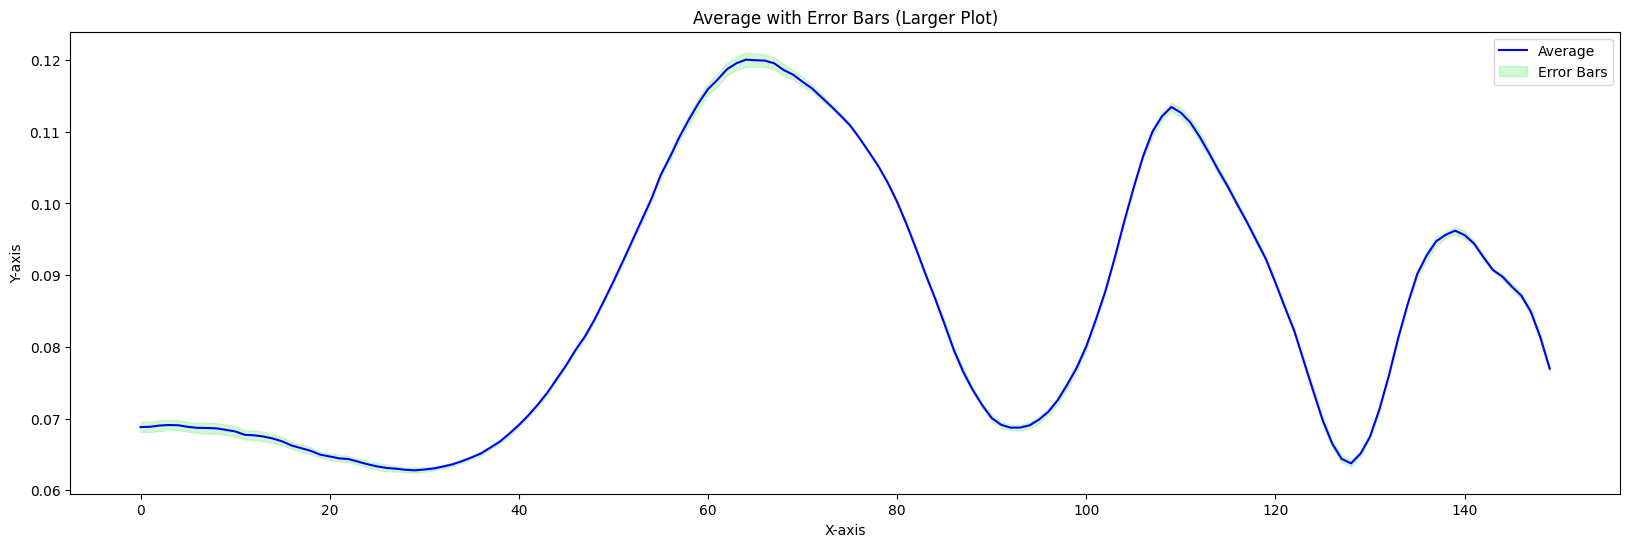

In [ ]:
device_index = 7
data = list_data[device_index]

# Calculate the average and standard error (SEM)
average = np.mean(data, axis=0)
sem = np.std(data, axis=0) / np.sqrt(len(data))

# Create x values (e.g., assuming data points are equally spaced)
x = np.arange(len(average))

# Create a larger figure
plt.figure(figsize=(20, 6))  # Adjust the figsize as needed

# Plot the average
plt.plot(x, average, label='Average', color='b')  # Use blue for the average line

# Plot the error bars as a shaded region with a different color (e.g., green)
plt.fill_between(x, average - sem, average + sem, alpha=0.4, color='lightgreen', label='Error Bars')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Average with Error Bars (Larger Plot)')
plt.legend()
plt.show()

Best Parameters:
[ 9.07623697e-02  2.85500151e-02 -1.00152004e-02  5.19876340e-02
  1.37890824e-06  1.06169695e-07  1.01065555e-07  2.00041165e+00
  2.55437788e+00 -8.90000000e-07] 0.9670831164009006


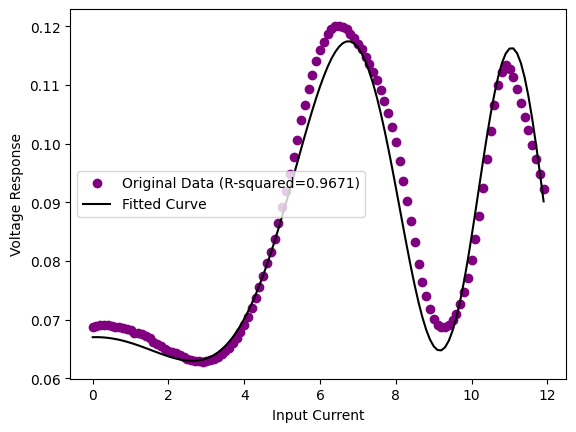

0.9670831164009006


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the voltage_non_ohmic function with Y, Z, alpha, and beta parameters
def voltage_non_ohmic(I, p1, p2, p3, p4):
    return (p4 * I**4 + p3 * I**3 + p2 * I**2 + p1 * I)

def cross_talk(I, alpha):
    return np.exp(alpha * I )

def mzm_transfer(I, offset, amplitude, alpha, p1, p2, p3, p4, P_pi, phase, R):
    return offset + amplitude * cross_talk(I, alpha) * np.cos((I * voltage_non_ohmic(I, p1, p2, p3, p4)) / P_pi * np.pi + phase) + R*I

# Provided data to fit
I_data = average[0:120]  # Assuming V_sum is your data
X_data = X[0:120]

# Define parameter names
param_names = ['offset', 'amplitude', 'alpha', 'p1', 'p2', 'p3', 'p4', 'P_pi', 'phase','R']

# Define parameter bounds and increments
amplitude = (np.array(I_data).max() - np.array(I_data).min()) / 2
offset = amplitude + np.array(I_data).min()
alpha = -0.01
p1 = 0.052
p2 = 0.00000100
p3 = 0.00000010
p4 = 0.0000001
P_pi = 2
phase = 2.65
R = 0.0000001
# Define bounds for the parameters based on the initial parameters
param_bounds = ([offset * 0.95, amplitude * 0.99, alpha - 0.0001, p1 - 0.0001, p2 - 0.001, p3 - 0.001, p4 - 0.001, P_pi * 0.90, phase - 1,R-0.000001],  # Lower bounds
                [offset * 1.05, amplitude * 1.01, alpha + 0.0001, p1 + 0.0001, p2 + 0.001, p3 + 0.001, p4 + 0.001, P_pi * 1.10, phase + 1,R+0.000001])  # Upper bounds

initial_guess = [offset, amplitude, alpha, p1, p2, p3, p4, P_pi, phase, R]
try:
    params, covariance = curve_fit(mzm_transfer, X_data**2, I_data, p0=initial_guess, bounds=param_bounds, maxfev=100)
    y_fit = mzm_transfer(X_data, *params)
    r_squared = r2_score(I_data, y_fit)

except Exception as e:
    print("Error during curve fitting:", e)

# Print the best parameters and R-squared
print("Best Parameters:")

# Plot the original data and the fitted curve with the best parameters
y_fit = mzm_transfer(X_data, *params)

# Calculate the R-squared (coefficient of determination)
r_squared = r2_score(I_data, y_fit)
print(params,r_squared)
plt.plot(X_data, I_data, label=f'Original Data (R-squared={r_squared:.4f})', marker='o', linestyle='none', color='purple')
plt.plot(X_data, y_fit, label='Fitted Curve', color='black')
plt.xlabel('Input Current')
plt.ylabel('Voltage Response')
plt.legend()
plt.show()
print(r_squared)

In [ ]:
fit_folder = f".data\\blue\\mzm\\fitting_params\\current"
dictionary = func.read_pkls_in_current_directory(fit_folder)
params     = func.get_parameters_as_list(dictionary[7])
params[1:10]

[0.09076236971361705,
 0.028550015110061184,
 -0.010015200412488002,
 0.051987634040820935,
 1.3789082385313673e-06,
 1.0616969473630816e-07,
 1.0106555506473652e-07,
 2.000411646671713,
 2.554377875230752]

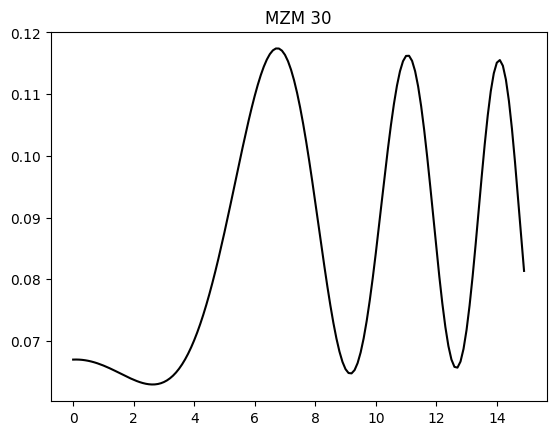

0.8961528850475354


In [ ]:

PYPY = average
PUPU = X



POPO = func.mzm_transfer(PUPU, *params[1:10])
plt.plot(PUPU, POPO, color='black')
plt.title(f"MZM {params[0]}")
plt.show()

print(r2_score(PYPY, POPO))

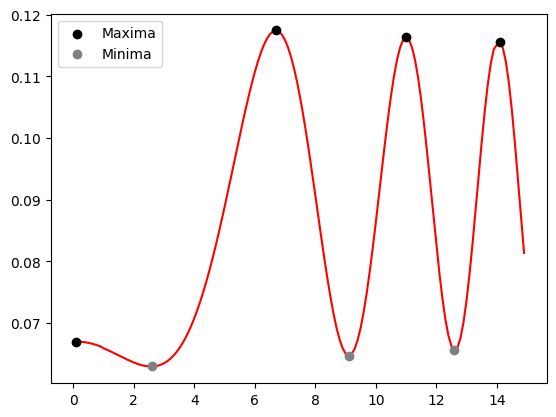

[6.7, 11.0, 14.1] [2.6, 9.1, 12.6]


In [ ]:
Max,Min = func.maxmin([POPO],PUPU)
print(Max[0][1:],Min[0])

In [ ]:
input = False
max_min_folder = f".data\\blue\\mzm"
if input:
    device_minmax = func.create_device_minmiax_info(params[0],Max[0][1:],Min[0])
    func.save_fitting_params(device_minmax,"max_min","max_min",max_min_folder)

In [ ]:
input = False
# to remove R
# params = np.delete(params,-1)
if input:
    d = func.create_parameter_dictionary(DEVICES[device_index],*params,r_squared)
    func.save_fitting_params(d,meas_folder)

In [ ]:
import importlib
importlib.reload(func)

<module 'functions' from 'c:\\Users\\QPG\\Downloads\\Marseille\\Marseille\\functions.py'>